In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
# Data Collection 

In [4]:
from datetime import datetime

In [5]:
now = datetime.now()

# Downloading data
# ticker is an stock symbol see yahoo finance TSLA for Tesla GOOG for google

ticker = 'AAPL'
start = datetime(now.year-10, now.month, now.day) # 2024- 10 = 2014 (10 years data)
end = now
df = yf.download(ticker, start, end)
df.head

/var/folders/1v/ydk5lrn5705cjsyclwmd_nwc0000gn/T/ipykernel_14686/2398718733.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.head of Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2015-06-15   28.425873   28.497542   28.154873   28.242220  175955600
2015-06-16   28.578169   28.634161   28.302691   28.450508  125976400
2015-06-17   28.510979   28.640878   28.385556   28.605044  131672400
2015-06-18   28.640881   28.737186   28.493063   28.495303  141628800
2015-06-19   28.354197   28.627436   28.309404   28.602800  218867600
...                ...         ...         ...         ...        ...
2025-06-09  201.449997  206.000000  200.020004  204.389999   72862600
2025-06-10  202.669998  204.350006  200.570007  200.600006   54672600
2025-06-11  198.779999  204.500000  198.410004  203.500000   60989900
2025-06-12  199.199997  199.679993  197.360001  199.080002   43904600
2025-06-13  196.449997  200.369995  195.699997  199.729996  

In [6]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-06-15,28.425873,28.497542,28.154873,28.242220,175955600
2015-06-16,28.578169,28.634161,28.302691,28.450508,125976400
2015-06-17,28.510979,28.640878,28.385556,28.605044,131672400
2015-06-18,28.640881,28.737186,28.493063,28.495303,141628800
2015-06-19,28.354197,28.627436,28.309404,28.602800,218867600


In [7]:
# 2-Data Exploration & visualization

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.shape

(2516, 5)

In [10]:
# Drop null values if there is..
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [11]:
# Stastical overview
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,102.516362,103.545981,101.374968,102.418432,1.102522e+08
std,68.757034,69.433317,67.989032,68.680203,6.447689e+07
min,20.647457,20.951435,20.448617,20.569752,2.323470e+07
25%,38.236646,38.545720,37.566303,38.251858,6.755570e+07
50%,83.473988,84.917526,81.374337,84.159310,9.476420e+07
75%,162.911385,164.436394,161.100197,162.664987,1.342539e+08
max,258.396667,259.474086,257.010028,257.568678,6.488252e+08


In [12]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [13]:
# reset Index instead of data it will start from 0 to n
df = df.reset_index()

In [14]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-06-15,28.425873,28.497542,28.154873,28.242220,175955600
1,2015-06-16,28.578169,28.634161,28.302691,28.450508,125976400
2,2015-06-17,28.510979,28.640878,28.385556,28.605044,131672400
3,2015-06-18,28.640881,28.737186,28.493063,28.495303,141628800
4,2015-06-19,28.354197,28.627436,28.309404,28.602800,218867600


Text(0, 0.5, 'Close Price')

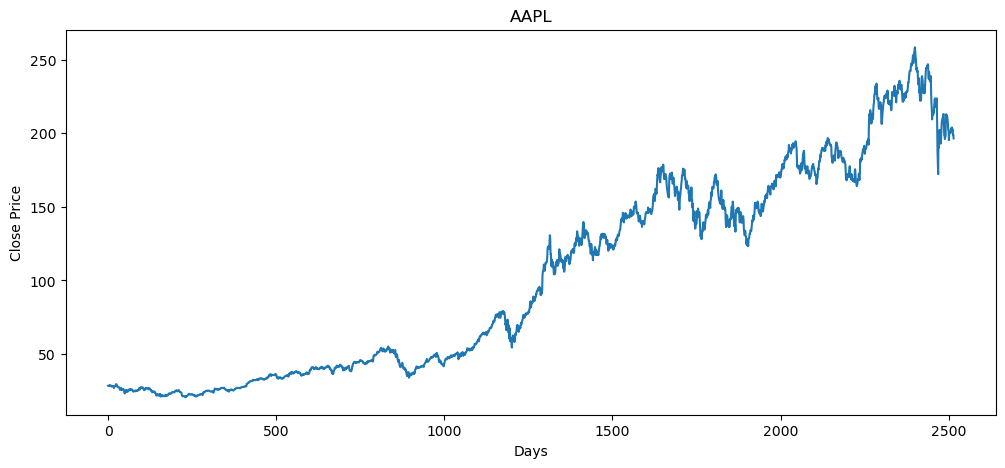

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

In [16]:
# 3- Feature ENgineering
# creating new features from the exiting data so that the model predicts data accurately

In [17]:
# In stock prediction stock predictors calculate the moving average to predicts the stocks (noise and smoothness)

In [18]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100
# Moving average of 5 days (prev 5 data /5)
# MA of 5 daya --> null null null null (10+20+30+40+50)/5 = 30 40

temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[2:7])/5)


50.0


In [19]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [20]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [21]:
### 100 daya Moving Average

In [22]:
### 100 daya Moving Average

In [23]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-06-15,28.425873,28.497542,28.154873,28.242220,175955600,NaN
1,2015-06-16,28.578169,28.634161,28.302691,28.450508,125976400,NaN
2,2015-06-17,28.510979,28.640878,28.385556,28.605044,131672400,NaN
3,2015-06-18,28.640881,28.737186,28.493063,28.495303,141628800,NaN
4,2015-06-19,28.354197,28.627436,28.309404,28.602800,218867600,NaN


In [24]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-06-15,28.425873,28.497542,28.154873,28.242220,175955600,NaN
1,2015-06-16,28.578169,28.634161,28.302691,28.450508,125976400,NaN
2,2015-06-17,28.510979,28.640878,28.385556,28.605044,131672400,NaN
3,2015-06-18,28.640881,28.737186,28.493063,28.495303,141628800,NaN
4,2015-06-19,28.354197,28.627436,28.309404,28.602800,218867600,NaN
...,...,...,...,...,...,...,...
98,2015-11-02,27.263155,27.303652,26.909935,27.177663,128813200,NaN
99,2015-11-03,27.575871,27.782852,27.155156,27.175405,182076000,26.429576
100,2015-11-04,27.447630,27.857095,27.362138,27.701857,179544400,26.419794


Text(0, 0.5, 'Price')

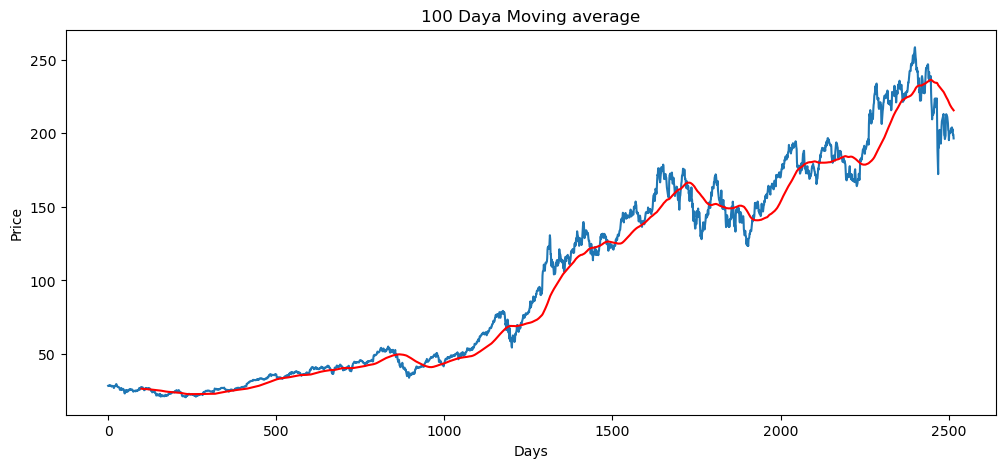

In [25]:
plt.figure(figsize = (12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Daya Moving average')
plt.xlabel('Days')
plt.ylabel('Price')


Text(0, 0.5, 'Price')

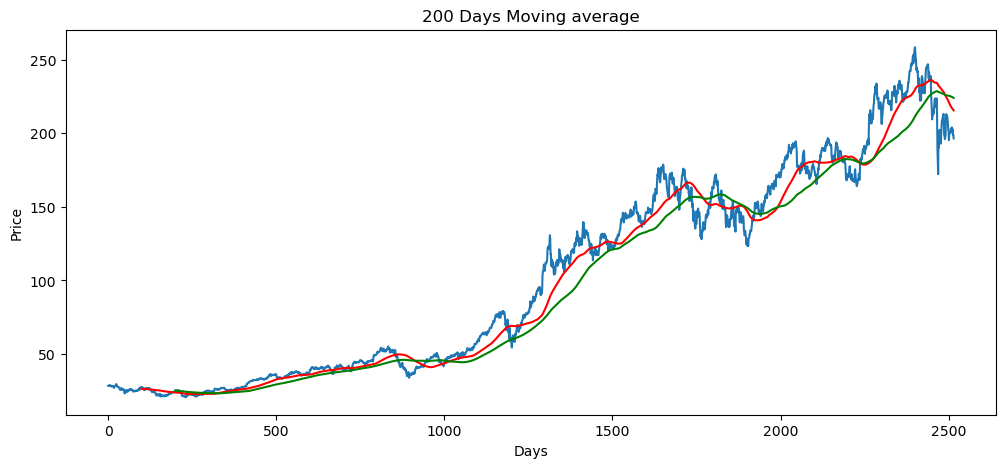

In [26]:
# 200 days average
df['MA_200'] = df.Close.rolling(200).mean()

plt.figure(figsize = (12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving average')
plt.xlabel('Days')
plt.ylabel('Price')


In [27]:
# percentage changed in each trading in each days
### calculating % changed in each trading session
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,28.425873,NaN
1,28.578169,0.005358
2,28.510979,-0.002351
3,28.640881,0.004556
4,28.354197,-0.010010
...,...,...
2511,201.449997,-0.012113
2512,202.669998,0.006056
2513,198.779999,-0.019194


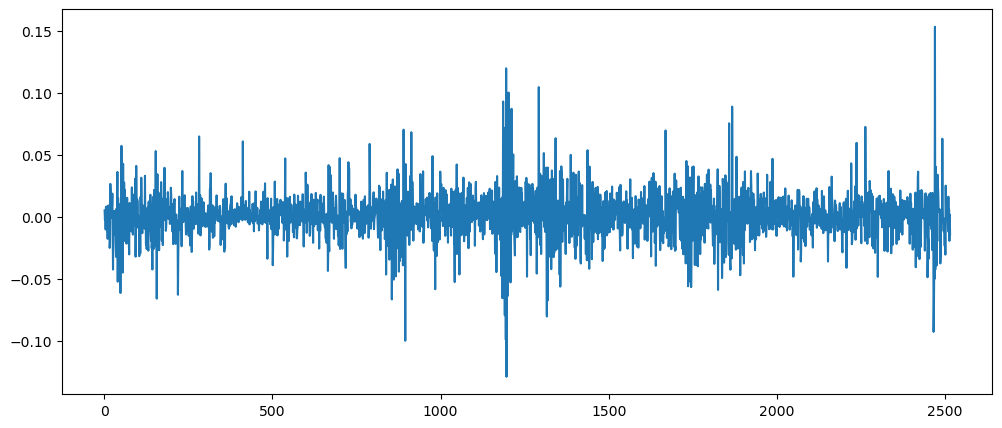

In [28]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

In [29]:
# 4 Daata pre processing
# splitting data
df.shape

(2516, 9)

In [30]:
# Splitting data into traingin ans testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])
print(data_testing)
print(data_training)

Ticker        AAPL
1761    134.964722
1762    129.797638
1763    130.663712
1764    133.291550
1765    128.006363
...            ...
2511    201.449997
2512    202.669998
2513    198.779999
2514    199.199997
2515    196.449997

[755 rows x 1 columns]
Ticker        AAPL
0        28.425873
1        28.578169
2        28.510979
3        28.640881
4        28.354197
...            ...
1756    143.084457
1757    143.832443
1758    146.361862
1759    145.623734
1760    140.387741

[1761 rows x 1 columns]


In [31]:
data_training

Ticker,AAPL
0,28.425873
1,28.578169
2,28.510979
3,28.640881
4,28.354197
...,...
1756,143.084457
1757,143.832443
1758,146.361862
1759,145.623734


In [32]:
# Scale down the data for LSTM we need to compress the data to fit 0 and 1


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [33]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04923105],
       [0.05019496],
       [0.0497697 ],
       ...,
       [0.79566999],
       [0.79099824],
       [0.75785866]])

In [34]:
# 5 Sequence Creation
# LSTM requires sequence data
# 12,13,12,15,10,14,16,18,10,24  20
# x_train = perviosu data y_train = predicted future


In [35]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.ndim


3

In [36]:
y_train.ndim

1

In [37]:
# 6 Building Machine Learning Model
import sys
print(sys.version)


3.10.18 (main, Jun  5 2025, 08:37:47) [Clang 14.0.6 ]


In [38]:
!pip install tensorflow

In [40]:
import tensorflow as tf
print(tf.__version__)

2.19.0
